# Modifying operator to be positive definite via rational function

Let $A$ be a symmetric indefinite operator, and suppose that the spectrum of $A$ resides in the interval $[m, M]$, where $m$ is negative and small in magnitude compared to $M$. We seek to modify $A$ to make it positive semi-definite, by forming an approximation of the following form:
$$\underbrace{A}_\text{indefinite} \approx \underbrace{c_0 + c_1 A + c_2 (A + \mu I)^{-k}}_\text{positive semidefinite}$$
where $\mu > |m|$ is a constant that we will have to tune. We may write this approximation as $A \approx f(A)$, where $f$ is the rational function
$$f(\lambda) := c_0 + c_1 \lambda + \frac{c_2}{\left(\lambda+\mu\right)^k}.$$

We want $c_0, c_1, c_2$ such that:
 - $f(\lambda)$ is nonnegative on $[m, M]$ 
 - $f(\lambda) \approx \lambda$ when $\lambda$ is positive, 
 - $f(0)=0$ is the minimum of $f(\lambda)$ on $[m, M]$
 - $f(\lambda)$ is small when $\lambda$ is small

To this end, we choose $c_0, c_1, c_2$ to be the unique constants satisfying the following conditions:
 1. $f(M) = M$
 2. $f(0) = 0$
 3. $f'(0) = 0$
 
These conditions may be written in matrix form as:
$$A(\mu) c = b.$$
where
$$
A(\mu) := \begin{bmatrix}
1 & M & \left(M+\mu\right)^{-k} \\
1 & 0 & \mu^{-k} \\
0 & 1 & -k\mu^{-k-1}
\end{bmatrix}
$$

$$
c :=
\begin{bmatrix}
c_0 \\ c_1 \\ c_2
\end{bmatrix}
$$
and
$$
b :=
\begin{bmatrix}
M \\ 0 \\ 0
\end{bmatrix}.
$$


Row 1 corresponds to the condition $f(M)=M$, row 2 corresponds to the condition $f(0)=0$, and row 3 corresponds to the condition $f'(0)=0$. To find the third row of $A$, we used the fact that the derivative of $f$ is given by
$$f'(\lambda) = c_1 - k\frac{c_2}{(\lambda+\mu)^{k+1}}.$$

In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

In [2]:
m = -0.1
M = 10
k = 1

b = np.array([M, 0, 0])

def make_A(mu):
    return np.array([[1, M, np.power(M+mu,-k)], 
                     [1, 0, np.power(0+mu,-k)],  
                     [0, 1, -k*np.power(mu,-k-1)]])

### Medium-sized $\mu$

c= [-0.204   1.02    0.0408]
m= -0.1 , M= 10
f(m)= 0.1020000000000012 , f(0)= 1.1657341758564144e-15 , f(M)= 10.0 , f_prime(0)= 0.0


(-0.15000000000000002, 0.15000000000000002)

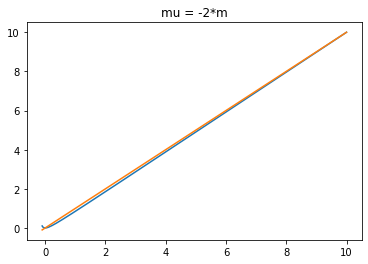

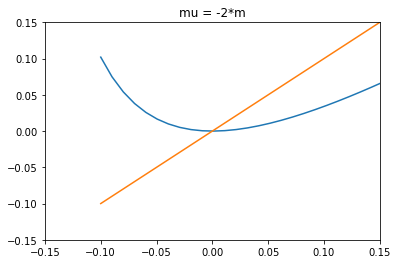

In [3]:
mu = -2*m

A = make_A(mu)
c = np.linalg.solve(A, b)

f = lambda x: c[0] + c[1] * x + c[2] * np.power(x + mu, -k)
f_prime = lambda x: c[1] - k * c[2] * np.power(x + mu, -k-1)

print('c=', c)
print('m=', m, ', M=', M)
print('f(m)=', f(m), ', f(0)=', f(0), ', f(M)=', f(M), ', f_prime(0)=', f_prime(0))

xx = np.linspace(m, M, 1000)
ff = f(xx)

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -2*m')

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -2*m')

plt.xlim([1.5*m, -1.5*m])
plt.ylim([1.5*m, -1.5*m])

### Small $\mu$

c= [-0.1061025   1.0105      0.01114076]
m= -0.1 , M= 10
f(m)= 2.020999999999998 , f(0)= -4.163336342344337e-16 , f(M)= 10.0 , f_prime(0)= 0.0
-1.920999999999998


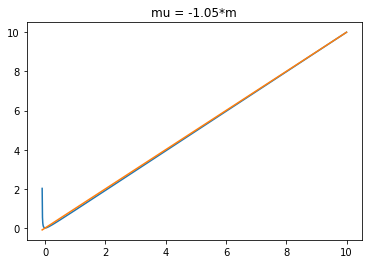

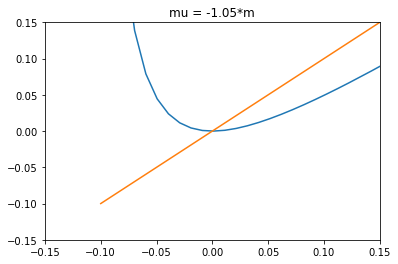

In [4]:
mu = -1.05*m

A = make_A(mu)
c = np.linalg.solve(A, b)

f = lambda x: c[0] + c[1] * x + c[2] * np.power(x + mu, -k)
f_prime = lambda x: c[1] - k * c[2] * np.power(x + mu, -k-1)

print('c=', c)
print('m=', m, ', M=', M)
print('f(m)=', f(m), ', f(0)=', f(0), ', f(M)=', f(M), ', f_prime(0)=', f_prime(0))

xx = np.linspace(m, M, 1000)
ff = f(xx)

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -1.05*m')

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -1.05*m')

plt.xlim([1.5*m, -1.5*m])
plt.ylim([1.5*m, -1.5*m])

print(abs(m) - (c[0] + c[1] * m + c[2] / (m + mu)))

## Large $\mu$

c= [-7.5  1.5 37.5]
m= -0.1 , M= 10
f(m)= 0.0030612244897945118 , f(0)= 0.0 , f(M)= 10.0 , f_prime(0)= 0.0
0.0969387755102046


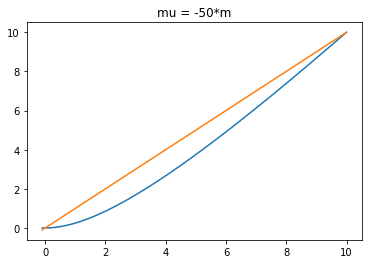

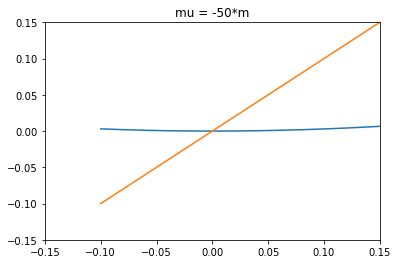

In [5]:
mu = -50*m

A = make_A(mu)
c = np.linalg.solve(A, b)

f = lambda x: c[0] + c[1] * x + c[2] * np.power(x + mu, -k)
f_prime = lambda x: c[1] - k * c[2] * np.power(x + mu, -k-1)

print('c=', c)
print('m=', m, ', M=', M)
print('f(m)=', f(m), ', f(0)=', f(0), ', f(M)=', f(M), ', f_prime(0)=', f_prime(0))

xx = np.linspace(m, M, 1000)
ff = f(xx)

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -50*m')

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu = -50*m')

plt.xlim([1.5*m, -1.5*m])
plt.ylim([1.5*m, -1.5*m])

print(abs(m) - (c[0] + c[1] * m + c[2] / (m + mu)))

## Choosing $\mu$

Now we find $\mu$ such that $f(m) = |m|$.

For initial guess, we choose $\mu_0 = -2m$

In [6]:
def res(mu):    
    A = make_A(mu)
    c = np.linalg.solve(A, b)
    return abs(m) - (c[0] + c[1] * m + c[2] * np.power(m + mu, -k))

# soln = root_scalar(res, x0 = -1.9*m, x1 = -2.1*m)
soln = root_scalar(res, bracket = [-1.01*m, -30.0*m] )
mu = soln.root

print('soln:')
print(soln)

print('res(mu)=', res(mu))

soln:
      converged: True
           flag: 'converged'
 function_calls: 15
     iterations: 14
           root: 0.2020202020202007
res(mu)= -1.915134717478395e-15


c= [-0.20610142  1.02020202  0.04163665]
m= -0.1 , M= 10
f(m)= 0.10000000000000192 , f(0)= 6.106226635438361e-16 , f(M)= 10.0 , f_prime(0)= 0.0
-1.915134717478395e-15


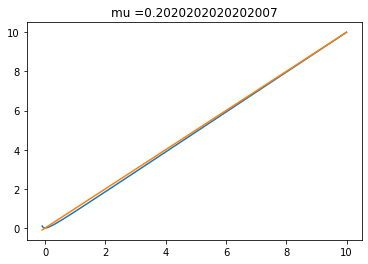

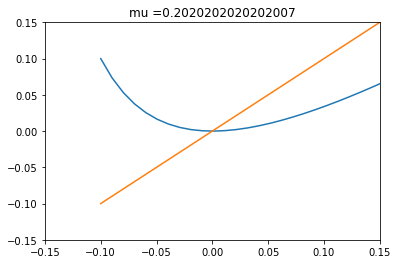

In [7]:
A = make_A(mu)
c = np.linalg.solve(A, b)

f = lambda x: c[0] + c[1] * x + c[2] * np.power(x + mu, -k)
f_prime = lambda x: c[1] - k * c[2] * np.power(x + mu, -k-1)

print('c=', c)
print('m=', m, ', M=', M)
print('f(m)=', f(m), ', f(0)=', f(0), ', f(M)=', f(M), ', f_prime(0)=', f_prime(0))

xx = np.linspace(m, M, 1000)
ff = f(xx)

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu =' + str(mu))

plt.figure()
plt.plot(xx, ff)
plt.plot(xx, xx)
plt.title('mu =' + str(mu))

plt.xlim([1.5*m, -1.5*m])
plt.ylim([1.5*m, -1.5*m])

print(abs(m) - (c[0] + c[1] * m + c[2] / (m + mu)))